In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../Datasets/weather_forecast.csv')
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X.head()

,Outlook,Temperature,Humidity,Windy
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [15]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False)

In [16]:
X = onehotencoder.fit_transform(df[['Outlook','Temperature','Humidity','Windy']])

In [17]:
X

array([[0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.]])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [19]:
print("Shape of X_train :",X_train.shape)
print("shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("shape Of y_test :",y_test.shape)

Shape of X_train : (11, 10)
shape of X_test : (3, 10)
Shape of y_train : (11,)
shape Of y_test : (3,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.9, 'x[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5555555555555556, 0.7, 'x[6] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[9] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'x[5] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6666666666666666, 0.3, 'x[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamp

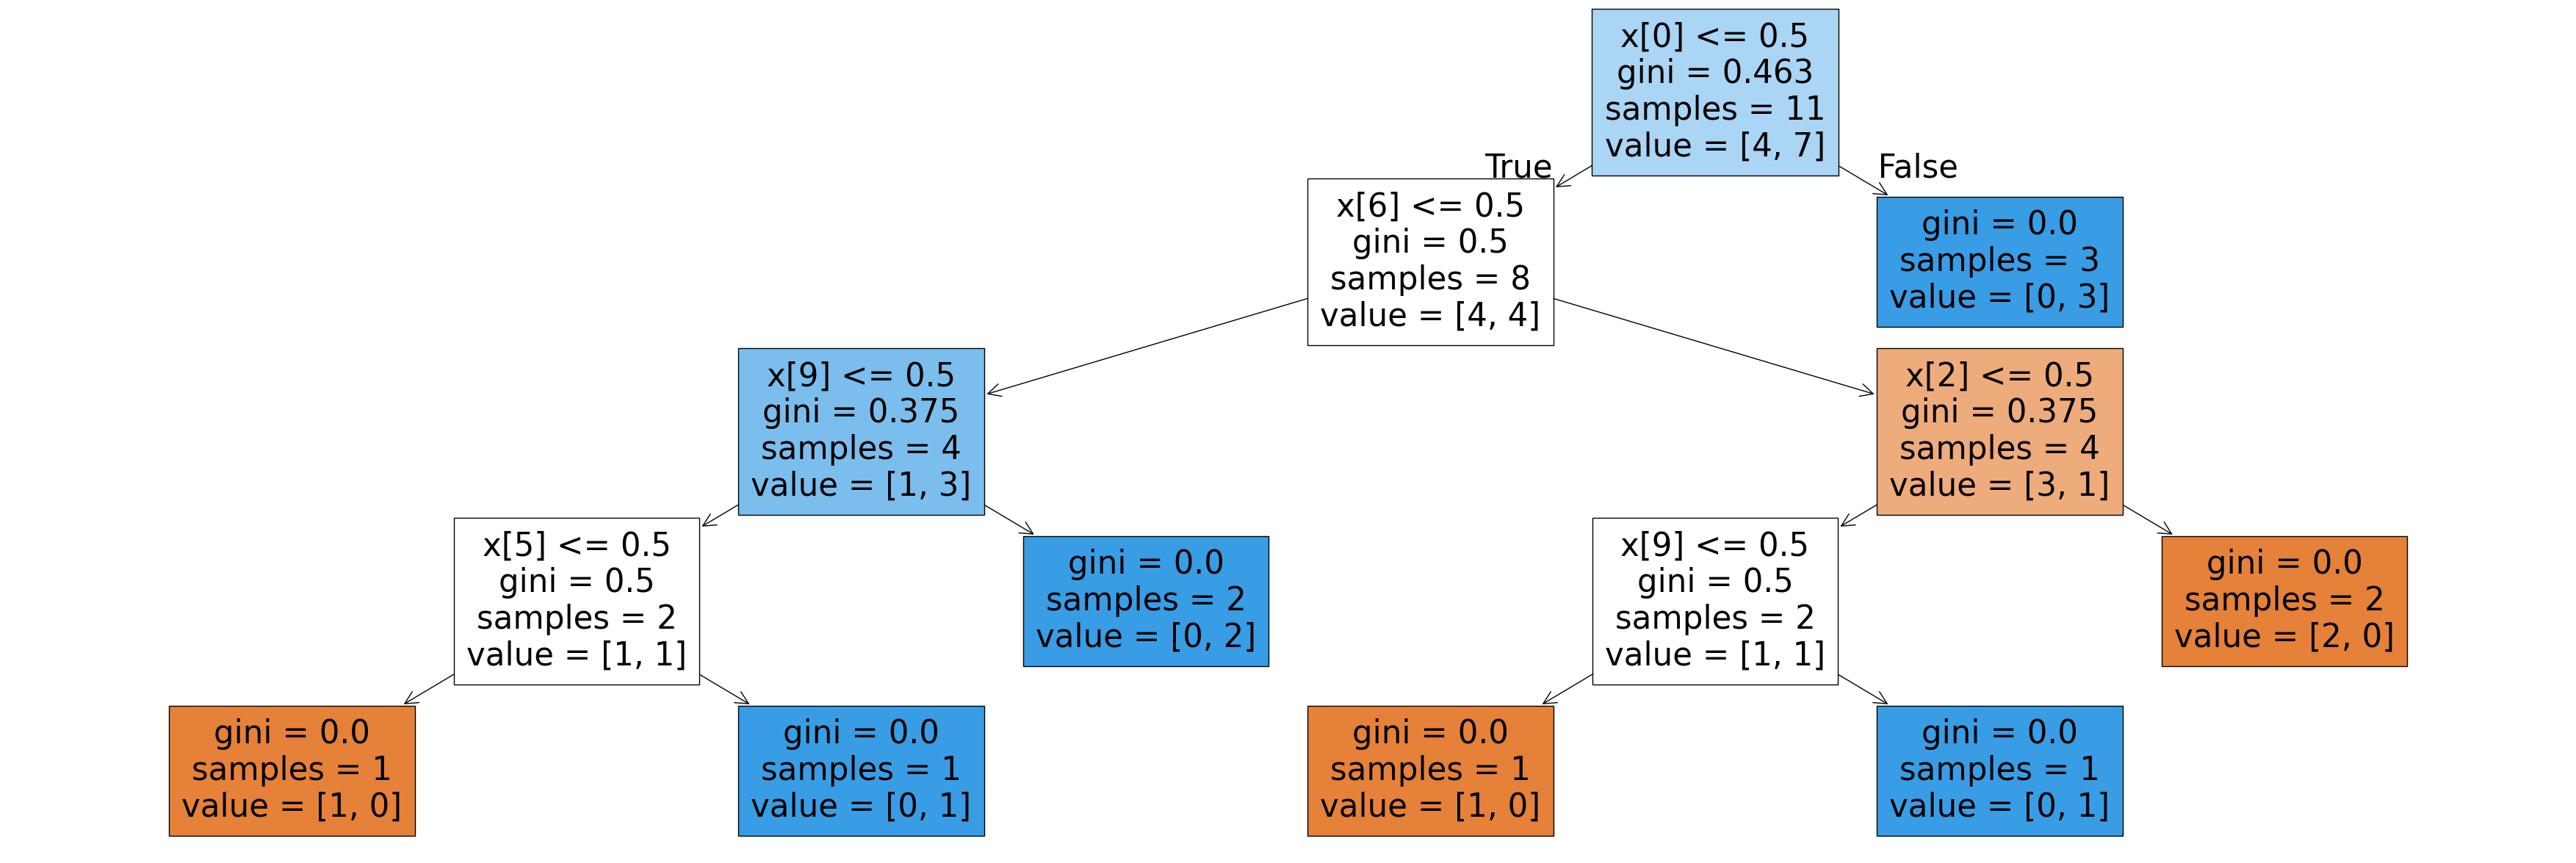

In [25]:
from sklearn import tree
plt.figure(figsize=(45,15))
tree.plot_tree(classifier,filled = True)

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[1 0]
 [0 2]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

